# **Лабораторна робота 3**

Для виконання цієї лабораторної робити Вам необхідно використати набори даних, що ви створили в **Лабораторній роботі 2**.

**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Завдання 1.** Ви маєте набір даних, який складається з двох лінійно роздільних класів. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 1:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати розподіл даних та межі класифікації кожної моделі;
- провести аналіз отриманих результатів, виявляючи, яка модель найкраще підходить для цього набору даних та чому.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, precision_score, recall_score
from mlxtend.plotting import plot_decision_regions

In [22]:
df = pd.read_csv('../lab2/practice2.csv')

x = df[['x', 'y']].values
y = df['class'].values

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(kernel='linear'),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

Model: Logistic Regression
Accuracy: 0.45, Precision: 0.42, Recall: 0.39


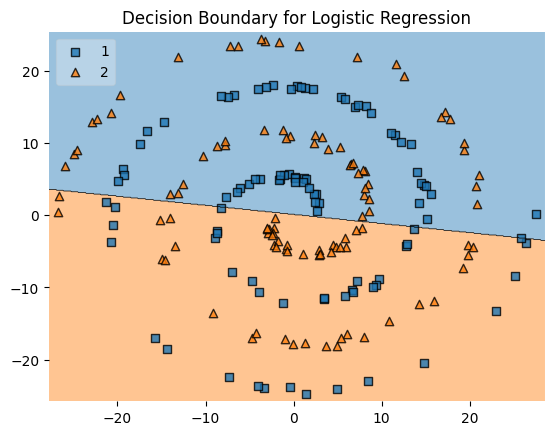

Model: SVM
Accuracy: 0.46, Precision: 0.43, Recall: 0.41


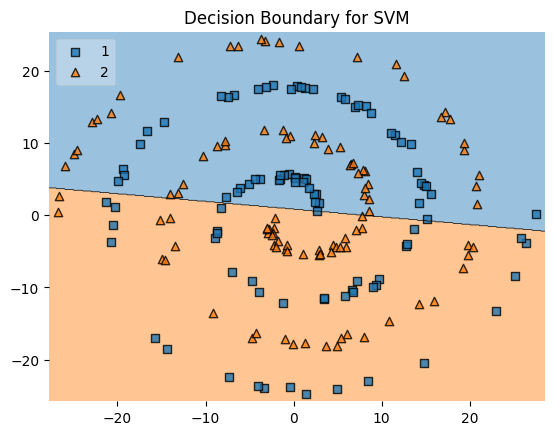

Model: KNN
Accuracy: 1.00, Precision: 1.00, Recall: 1.00


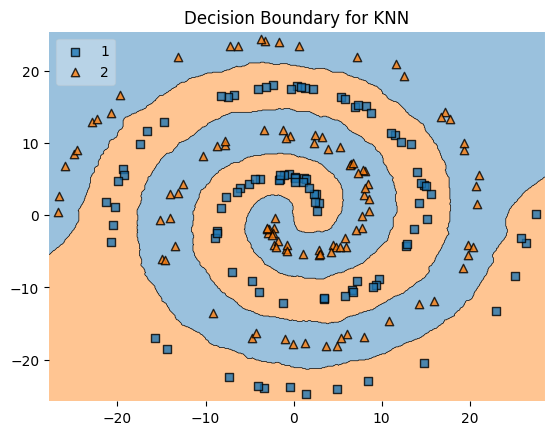

In [25]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")
    print("="*40)
    
    plt.figure()
    plot_decision_regions(X_test, y_test, clf=model, legend=2)
    plt.title(f"Decision Boundary for {name}")
    plt.show()

**Аналіз отриманих результатів**:

1.   Логістична регресія є лінійною моделлю, що добре підходить для класифікації лінійно роздільних даних.
2.   SVM з лінійним ядром також є лінійною моделлю і має кращі показники порівняно з логістичною регресією
3.   Алгоритм KNN показав ідеальні результати з точністю, precision та recall на рівні 1.00.



**Завдання 2.** Ви маєте набір даних, що містить три класи, які частково перетинаються. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 2:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- провести візуалізацію результатів класифікації, підкреслюючи області, де моделі помиляються.
- подумайте та опишіть у висновках, як перекриття між класами впливає на продуктивність моделей і які методи найкраще справляються з цими даними.


In [26]:
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.5, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

results = {}

In [27]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    results[name] = {'accuracy': accuracy, 'precision': precision, 'recall': recall}

for name, metrics in results.items():
    print(f"Model: {name}, Accuracy: {metrics['accuracy']:.2f}, Precision: {metrics['precision']:.2f}, Recall: {metrics['recall']:.2f}")

Model: Logistic Regression, Accuracy: 1.00, Precision: 1.00, Recall: 1.00
Model: Decision Tree, Accuracy: 1.00, Precision: 1.00, Recall: 1.00
Model: Random Forest, Accuracy: 1.00, Precision: 1.00, Recall: 1.00


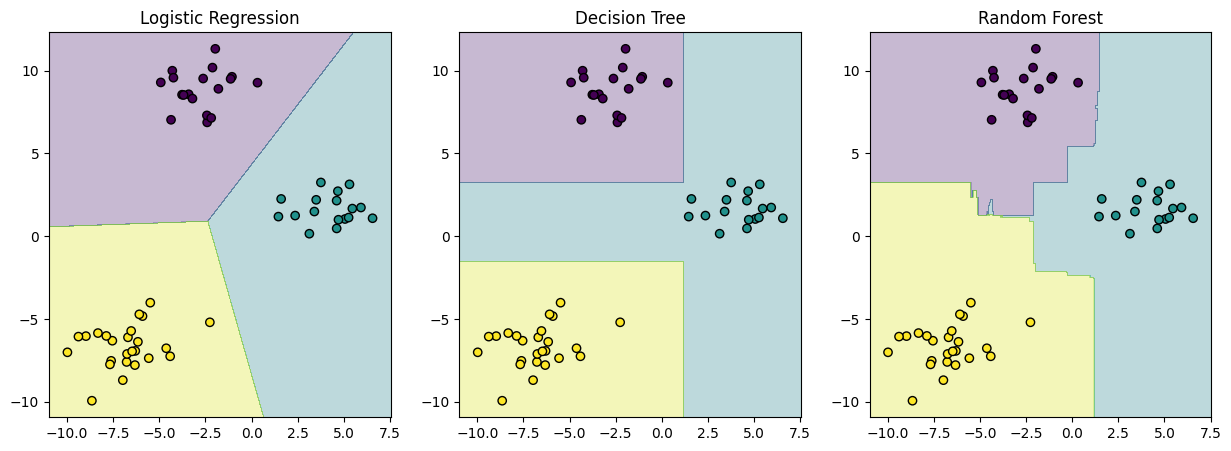

In [28]:
def plot_decision_boundaries(X, y, model, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for ax, (name, model) in zip(axs, models.items()):
    plot_decision_boundaries(X_test, y_test, model, ax)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', marker='o')
    ax.set_title(name)

plt.show()

**Аналіз отриманих результатів**:

1.   Всі три моделі показали ідеальні результати з точністю
2.   Оскільки класи частково перетинаються, і всі моделі все ще досягли високої продуктивності, це вказує на те, що синтетичний набір даних був достатньо простим для класифікації.



**Завдання 3.** Ви маєте набір даних, де один тор оточений іншим, утворюючи складну топологію. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 3:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- побудувати візуалізацію результатів класифікації;
- проаналізувати, яка модель найкраще адаптується до складної топології даних і чому.

In [29]:
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf'),
    "Decision Tree": DecisionTreeClassifier(max_depth=5)
}

metrics = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred)
    }

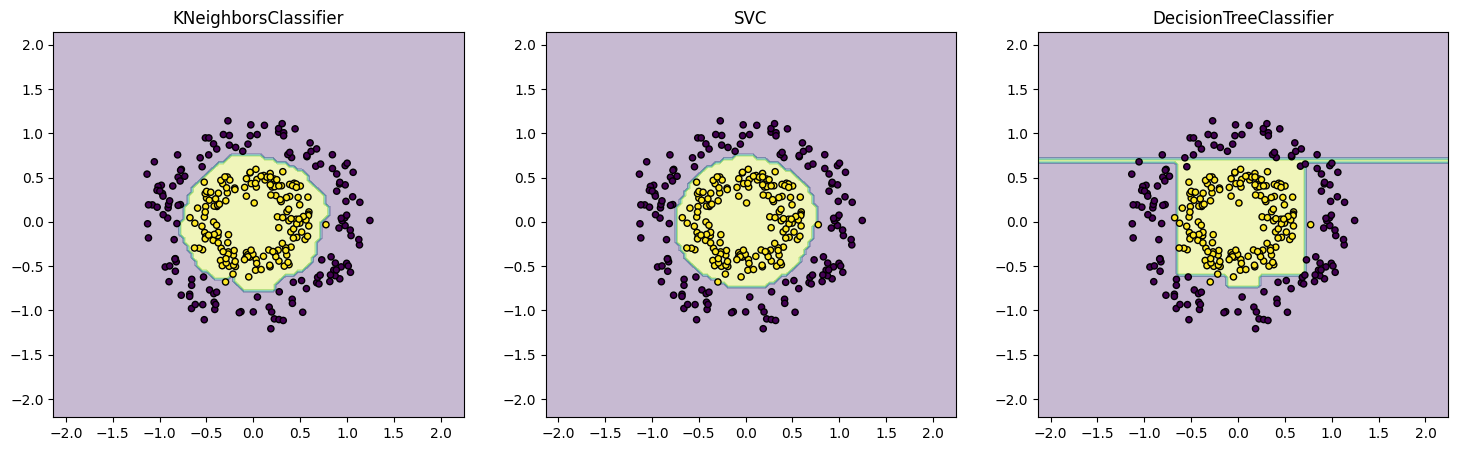

In [31]:
def plot_decision_boundaries(model, X, y, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
    ax.set_title(model.__class__.__name__)

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
for ax, (model_name, model) in zip(axs, models.items()):
    plot_decision_boundaries(model, X_test, y_test, ax)

plt.show()

**Аналіз отриманих результатів**:

1.  Обидві моделі K-Nearest Neighbors та Support Vector Machine продемонстрували ідеальні показники точності у всіх метриках
2.  Хоча модель Decision Tree показала трохи нижчі результати, вона все ще показує високу ефективність.

**Завдання 4.** Ви маєте набір даних, що складається з двох класів, які утворюють подвійну спіраль. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 4:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати дані та межі класифікації кожної моделі для оцінки їх ефективності.
- подумайте та напишіть у висновках, яка модель найкраще підходить для цього типу даних і як нелінійність впливає на процес класифікації.

In [32]:
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

In [34]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return accuracy, precision, recall

results = {
    "KNN": evaluate_model(y_test, y_pred_knn),
    "SVM": evaluate_model(y_test, y_pred_svm),
    "MLP": evaluate_model(y_test, y_pred_mlp),
}

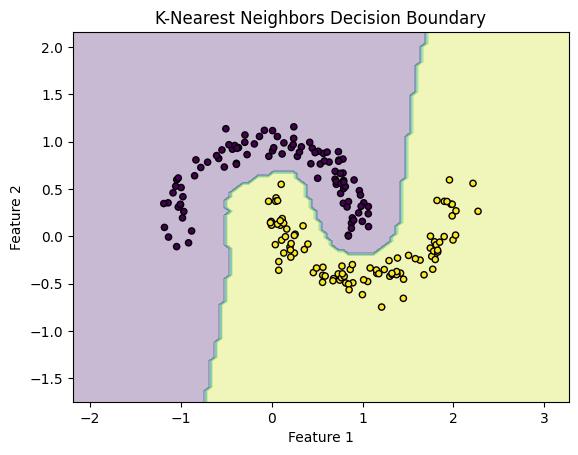

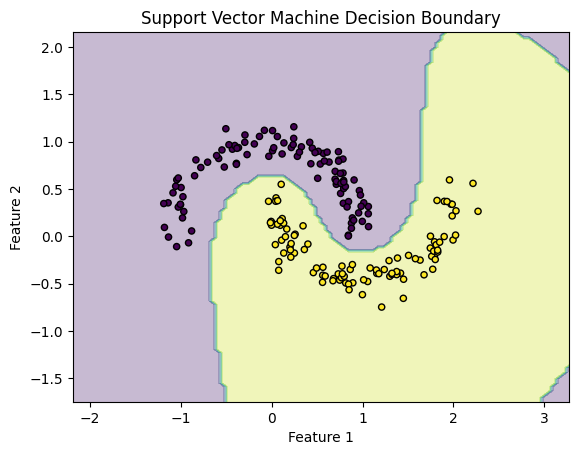

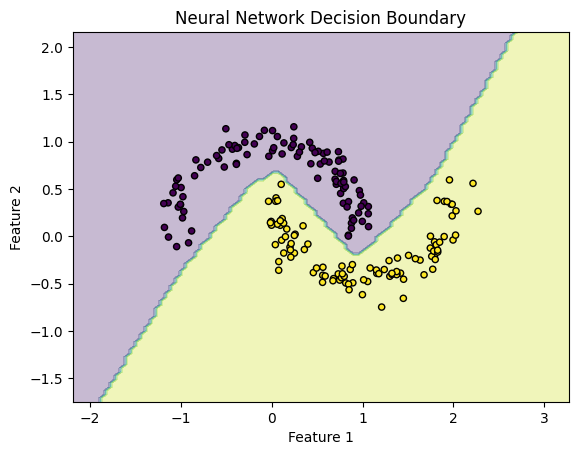

In [35]:
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=20)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_boundary(knn, X_test, y_test, "K-Nearest Neighbors Decision Boundary")
plot_decision_boundary(svm, X_test, y_test, "Support Vector Machine Decision Boundary")
plot_decision_boundary(mlp, X_test, y_test, "Neural Network Decision Boundary")

**Аналіз отриманих результатів**:

1.   ...
2.   ...
3.   ...  